# Natural Language Processing
## Detecting Depression by analyzing social media posts using traditional and deep learning models

The dataset for this project has been obtained from kaggle [https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned] with a usability score of 10.00. 

- This project aims to improve the early detection of depression in individuals by analyzing their social media posts. Natural language processing techniques are applied to solve problems that involve human-computer interaction using languages whether in written or spoken form. 

- Mental health detection from social media is an NLP problem because it requires understanding, processing, and analyzing human language to make mental health predictions

- Traditional and deep learning machine learning models will be built and evaluated to solve this problem.

## Import Libraries

In [1]:
# ignore warnings to make notebook cleaner
import warnings
warnings.filterwarnings('ignore')

In [2]:
# install modules 
!pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install langdetect

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# import required libraries 
import os
import sys
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import spacy
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from textblob import Word
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import GridSearchCV

## Load the dataset

In [9]:
# load the dataset
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')

In [10]:
# examine the head of the dataset
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [11]:
# examine the tail of the dataset
df.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


## Exploratory Data Analysis
- Examine the shape of the data
- Examine the size
- Examine the description and dataframe information
- Plot Countplot of class distribution
- Plot Distribution of Text lengths

In [12]:
# examine shape of dataframe 
df.shape

(7731, 2)

In [13]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [14]:
# describe dataframe
df.describe()

,is_depression
count,7731.000000
mean,0.495537
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
# examine size of the dataset
df.size

15462

In [16]:
# examine missing values
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [17]:
# target class value count
df['is_depression'].value_counts()

is_depression
0    3900
1    3831
Name: count, dtype: int64

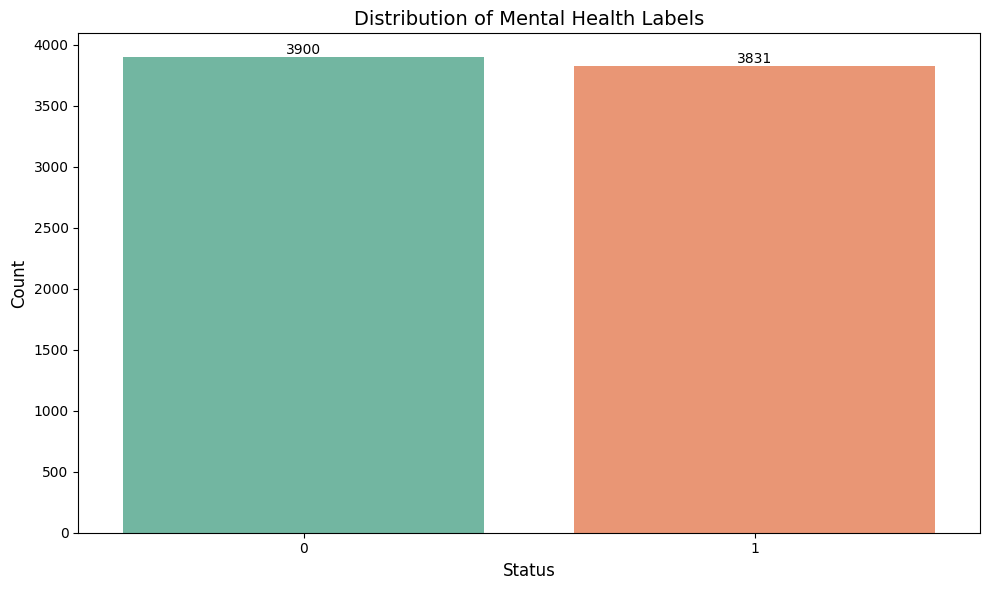

In [18]:
# countplot of target class

# Set figure size
plt.figure(figsize=(10, 6))

# Create tcountplot with a custom color palette
ax = sns.countplot(x='is_depression', data=df, palette='Set2')  

plt.title('Distribution of Mental Health Labels', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('mental_health_distribution.png', dpi=400)
plt.show()


- 0 is negative
- 1 is positive 

### Text Length

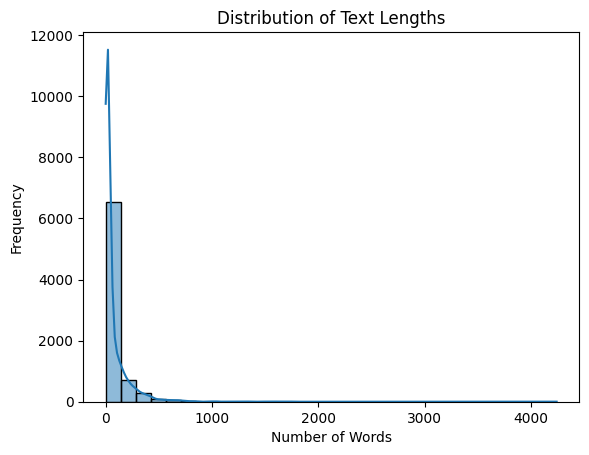

In [19]:
# extract texts
texts = df['clean_text'].astype(str).tolist()

## Text Length Analysis using Histogram
text_lengths = [len(text.split()) for text in df['clean_text']]  # word count
sns.histplot(text_lengths, bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig('text_length.png', dpi=500)
plt.show()

### Data Cleaning 
- Examine dataset for duplicated labels and texts.
- Check for missing values

**Sometimes the same text appears with different labels which might signal labeling errors or ambiguity.**

In [20]:
dupes = df[df.duplicated(subset=['clean_text'], keep=False)]
dupes_sorted = dupes.sort_values('clean_text')

# Check how often the same text has conflicting labels
conflicting = dupes_sorted.groupby('clean_text')['is_depression'].nunique()
conflicting = conflicting[conflicting > 1]
print(f"Texts with conflicting labels: {len(conflicting)}")

Texts with conflicting labels: 0


In [21]:
# Remove the conflicting label
conflicting_texts = conflicting.index
df = df[~df['clean_text'].isin(conflicting_texts)]

In [22]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

## Data Preprocessing 
- The re (regular expression) package will be applied to preprocess the data, making it clean and uniform for language models to understand and analyze. 
- the data preprocessing involves removing special characters and converting to lowercase. HTML tags, punctuation marks, and other special characters that will not contribute to sentiment classification will be removed. 



Removing special characters and converting to lower case. With my data read in, I can see several issues that may impact classification and text analysis. This includes upper case and lower-case letters (they may get mistaken for separate tokens and therefore make my language model even more sparse), special characters such as the HTML tags and various other punctuation marks that are likely not going to contribute to sentiment classification.

In [23]:
# define function to preprocesing data
def preprocess_text(df, column_name):
    """
    Preprocess the text in a given column of a DataFrame by:
    1. Removing special characters (e.g., ., ?, #, *, ^).
    2. Converting all text to lowercase.

    Parameters:
    - df: The pandas DataFrame containing the text data.
    - column_name: The column name that contains the text to be processed.
    
    Returns:
    - df: The DataFrame with the processed text column.
    """
    # Remove special characters
    df[column_name] = df[column_name].astype(str).apply(lambda x: re.sub("[,.?!#*^']", ' ', x))
    
    # Convert text to lowercase
    df[column_name] = df[column_name].astype(str).apply(lambda x: x.lower())
    
    return df

# apply function 
df = preprocess_text(df, 'clean_text')

In [24]:
# clean up tweets using 
def clean_tweet(text):
    '''This function cleans the garbage in the data such as links, usernames, url etc'''
    text = str(text)

    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove URLs (including markdown-style links)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    
    # Remove punctuation and other special characters
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()


In [25]:
# apply clean tweet function 
df['clean_text'] = df['clean_text'].apply(clean_tweet)

In [26]:
# define function to keep only texts
def keep_only_letters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
df['clean_text'] = df['clean_text'].astype(str).apply(keep_only_letters)


In [27]:
# import language detect because i am unsure if parts of my dataset are in other languages
from langdetect import detect

# define function
def keep_only_english(text):
    '''this function filters entire social media posts that are not in english'''
    try:
        return text if detect(text) == 'en' else ''
    except:
        return ''

df['clean_text'] = df['clean_text'].astype(str).apply(keep_only_english)


## Tokenization 

- Tokenization is important to reduce the size of raw text
- Feature extraction - text is represented numerically for algorithmic processing by using tokens.
- Facilitates creation of organized representation of language
- Useful for indexing and searching in systems that store and retrieve information efficiently based on words orphrases
- Essential preprocessing step transforms unprocessed text into a format appropriate for additional statistical and computational analysis.

The next step is to convert texts from lists of sentences to lists of lists of words. Represent inputs as a collection of words. This is also called lemmatisation. Lemmatisation reduces the sparsity of the dataset 


In [28]:
# define a funtion that converts sents to a collection of words 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(sentence, deacc=False))

In [29]:
# extract statements from dataframe and convert to a list
data = df['clean_text'].to_list()

In [30]:
# apply function
data_words = list(sent_to_words(data))

## Extract  Unigrams, Bigrams, and Trigrams 
- An n-gram is a contiguous sequence of n items (usually words or characters) from a given text.
- Train some simple n-gram-based language models.
- This article describes n-gram models [https://web.stanford.edu/~jurafsky/slp3/3.pdf]

In [31]:
# Bigram of words 
bigram = gensim.models.phrases.Phrases(data_words, min_count=5,
                                       threshold=100) 

In [32]:
bigram[data_words] 

In [33]:
# trigram of words
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)

In [34]:
bigram_model = gensim.models.phrases.Phraser(bigram) # This creates a faster, memory-efficient version of the bigram model trained earlier

In [35]:
trigram_model = gensim.models.phrases.Phraser(trigram) # This creates a faster, memory-efficient version of the trigram model trained earlier

In [36]:
# examining bigram created
for bigram in bigram_model.phrasegrams.keys():
    print(bigram) # Print the bigrams 

mental_health
mental_illness
daily_basis
every_single
killed_himself
committed_suicide
social_medium
smoking_weed
traumatic_event
falling_apart
financially_stable
high_school
self_esteem
wan_na
video_game
look_forward
fucking_retard
retard_filled
panic_attack
committing_suicide
sexually_assaulted
young_age
most_likely
commit_suicide
fall_asleep
http_www
story_short
mental_breakdown
drug_addict
coping_mechanism
light_headed
brain_fog
got_ta
gon_na
family_member
cold_turkey
withdrawal_symptom
greatly_appreciated
attempted_suicide
each_other
attention_seeker
intrusive_thought
mood_swing
eye_contact
master_degree
depressive_episode
long_term
similar_experience
playing_video
self_harm
birthday_party
under_control
substance_abuse
perfectly_fine
old_male
difference_between
socially_awkward
anti_depressant
fast_forward
psych_ward
full_blown
grocery_store
smoke_weed
outpatient_program
simple_task
mentally_ill
support_system
dating_apps
endless_cycle
tl_dr
minimum_wage
waiting_list
razor_blade
e

In [37]:
# examining trigram created
for trigram in trigram_model.phrasegrams.keys():
    print(trigram)

mental_health
mental_health_issue
mental_illness
daily_basis
every_single
killed_himself
committed_suicide
social_medium
smoking_weed
traumatic_event
falling_apart
financially_stable
high_school
self_esteem
low_self_esteem
wan_na
don_wan_na
video_game
look_forward
fucking_retard
such_fucking_retard
panic_attack
committing_suicide
sexually_assaulted
young_age
most_likely
commit_suicide
fall_asleep
http_www
wan_na_be
story_short
mental_breakdown
drug_addict
coping_mechanism
light_headed
brain_fog
got_ta
family_member
withdrawal_symptom
greatly_appreciated
attempted_suicide
each_other
attention_seeker
an_attention_seeker
intrusive_thought
mood_swing
eye_contact
master_degree
social_skill
depressive_episode
long_term
similar_experience
playing_video
playing_video_game
self_harm
birthday_party
wan_na_go
under_control
substance_abuse
perfectly_fine
old_male
difference_between
socially_awkward
fast_forward
psych_ward
full_blown
grocery_store
smoke_weed
simple_task
wan_na_talk
side_affect
dont

## Lemmatisation 
- Lemmmatisation reduces a word to its root meaningful form, while also considering the context and part of speech. i.e running becomes run
- Also, stop words are removed. Stop words are common words in a language that are usually filtered out in NLP tasks because they do not add significant meaning on their own. 

In [38]:
# import ntlk package and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\865515\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# remove stop words 
stop_words = stopwords.words('english') 
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords_from_list(data):
    """
    Removes stopwords from a list of tokenized sentences.

    Parameters:
        data (list of list of str): A list where each element is a list of words (tokens) from a sentence.

    Returns:
        list of list of str: The same list with stopwords removed from each sentence.
    """
    return [[word for word in doc if word not in stop_words] for doc in data]

# Apply it
data_words_no_stops = remove_stopwords_from_list(data_words) 

In [40]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def make_trigrams(texts):
    return[trigram_model[bigram_model[doc]] for doc in texts]

In [41]:
# obtaining a new set of bigram and trigram models

data_words_bigrams = make_bigrams(data_words_no_stops)
data_words_trigrams = make_trigrams(data_words_no_stops)

# print bigrams and trigrams 
for x, text in enumerate (data_words_bigrams):
    for word in text:
        if "_" in word:
            print(x, word)

0 mental_health
0 mental_health
0 mental_health
0 mental_health
0 mental_health
0 mental_health
0 mental_health
1 mental_health
1 mental_illness
5 daily_basis
7 every_single
14 committed_suicide
16 social_medium
18 smoking_weed
20 traumatic_event
25 mental_illness
26 mental_illness
26 falling_apart
26 mental_health
29 financially_stable
30 high_school
30 self_esteem
30 high_school
30 high_school
31 wan_na
31 video_game
33 look_forward
41 every_single
42 fucking_retard
49 panic_attack
50 committing_suicide
50 sexually_assaulted
50 young_age
50 commit_suicide
51 fall_asleep
52 mental_health
53 http_www
54 wan_na
57 look_forward
59 story_short
60 mental_breakdown
60 wan_na
61 drug_addict
61 coping_mechanism
61 wan_na
62 high_school
62 video_game
62 high_school
65 light_headed
70 daily_basis
70 every_single
75 commit_suicide
77 brain_fog
80 look_forward
80 high_school
81 got_ta
81 gon_na
83 family_member
86 family_member
87 cold_turkey
87 withdrawal_symptom
88 panic_attack
94 high_school
9

In [42]:
## download pretrained lemmatisation model
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     --------------------------------------- 0.1/12.8 MB 825.8 kB/s eta 0:00:16
     - -------------------------------------- 0.5/12.8 MB 4.0 MB/s eta 0:00:04
     ---------- ----------------------------- 3.3/12.8 MB 19.4 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 37.1 MB/s eta 0:00:01
     --------------------------------------  12.7/12.8 MB 93.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 73.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PRON', 'DET', 'PROPN']):
    """
    Perform lemmatization on a list of tokenized sentences using spaCy, keeping only the specified part-of-speech tags.

    Parameters:
        texts (list of list of str): A list of tokenized sentences (each sentence is a list of words).
        allowed_postags (list of str): Part-of-speech tags to keep (default includes nouns, adjectives, verbs, adverbs, pronouns, determiners, and proper nouns).

    Returns:
        list of list of str: Lemmatized version of the input texts, filtered by allowed POS tags.

    Example:
        Input: [['i', 'am', 'running', 'quickly']]
        Output: [['i', 'run', 'quickly']]  # Verb 'running' becomes 'run', pronoun 'i' is included
    """
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))  # Join the sentence into a string and process it with spaCy

        # Debugging: print tokens and their POS
        # print("Sentence:", sent)
        # for token in doc:
        #     print(f"{token.text} → {token.lemma_} ({token.pos_})")

        texts_out.append([
            token.lemma_ for token in doc 
            if token.pos_ in allowed_postags
        ])
    return texts_out


In [44]:
# exclude sentences less than 0
data_words_trigrams = [sent for sent in data_words_trigrams if len(sent) > 0]

In [45]:
# apply lemmatisation function 
# initialize spacy 'en' model, keeping only tagger component(for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams)

print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['understand', 'people', 'reply', 'immediately', 'op', 'invitation', 'talk', 'privately', 'mean', 'help', 'type', 'response', 'usually', 'lead', 'disappointment', 'disaster', 'usually', 'work', 'quite', 'differently', 'say', 'pm', 'casual', 'social', 'context', 'huge', 'admiration', 'appreciation', 'goodwill', 'good', 'citizenship', 'many', 'support', 'other', 'flag', 'inappropriate', 'content', 'even', 'know', 'many', 'struggle', 'hard', 'work', 'scene', 'information', 'resource', 'make', 'easy', 'give', 'get', 'quality', 'help', 'small', 'start', 'new', 'wiki', 'page', 'explain', 'detail', 'much', 'well', 'respond', 'public', 'comment', 'least', 'get', 'know', 'someone', 'maintain', 'depression', 'wiki', 'private', 'contact', 'full', 'text', 'current', 'version', 'summary', 'anyone', 'act', 'helper', 'invite', 'accept', 'private', 'contact', 'pm', 'chat', 'kind', 'offsite', 'communication', 'early', 'conversion', 'show', 'bad', 'intention', 'bad', 'judgement', 'e

- This preprocessing makes it easier to apply machine learning techniques as the language has been processed to make abstractions as possible as they can be. 

## Word Cloud 
- Generate word cloud of corpus 

In [46]:
def getWordCloud(hashtags):
    """ https://github.com/amueller/word_cloud """
    
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.png', dpi=500)
    plt.show()

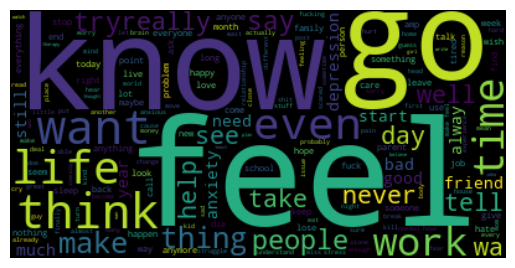

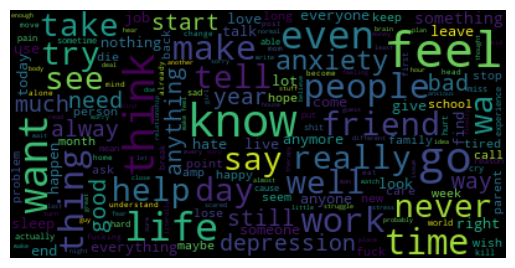

In [47]:
strings = []
for l in data_lemmatized:
    t = ' '.join(l)
    strings.append(t)
getWordCloud(strings)

# Text Classification
In this part, I will conduct text classification using traditional and dep learning models. A baseline accuracy score has been set to be 80%. Different models will be compared, their strengths and weaknesses and the two best performing models will be chosen. 
- The text data is the clean_text
- The label is the is_depressed

### Traditional Machine Learning Models Used
**To evaluate the classification performance, several traditional machine learning models were used:**

**Logistic Regression**
A simple linear model suitable for binary classification problems. Logistic Regression assumes that the decision boundary is linear and performs well with linearly separable data.

**Support Vector Machine (SVM) with RBF Kernel**
A powerful model that works well in high-dimensional spaces. The Radial Basis Function (RBF) kernel allows SVM to create complex decision boundaries, making it suitable for non-linear classification tasks like text classification.

**Evaluation Metrics**
- The models were evaluated using the following metrics:

-  Classification Report: Includes precision, recall, and F1-score, which give a detailed breakdown of how well the model performs in distinguishing between classes (depressed (0) vs. not depressed (1)).

- Confusion Matrix: Helps visualize the true positives, false positives, true negatives, and false negatives, allowing us to assess the model's performance in terms of accuracy, precision, recall, and F1-score.


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1016
           1       0.96      0.91      0.94      1149

    accuracy                           0.93      2165
   macro avg       0.93      0.94      0.93      2165
weighted avg       0.94      0.93      0.93      2165



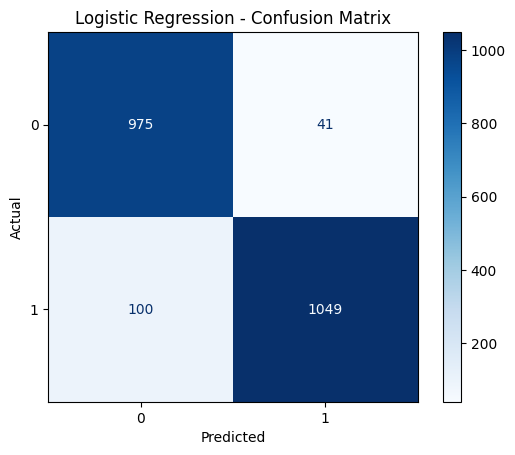

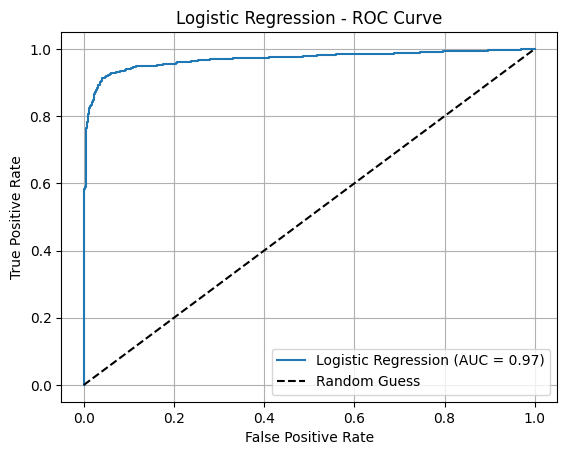


--- SVM (RBF Kernel) ---
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1016
           1       0.96      0.92      0.94      1149

    accuracy                           0.94      2165
   macro avg       0.94      0.94      0.94      2165
weighted avg       0.94      0.94      0.94      2165



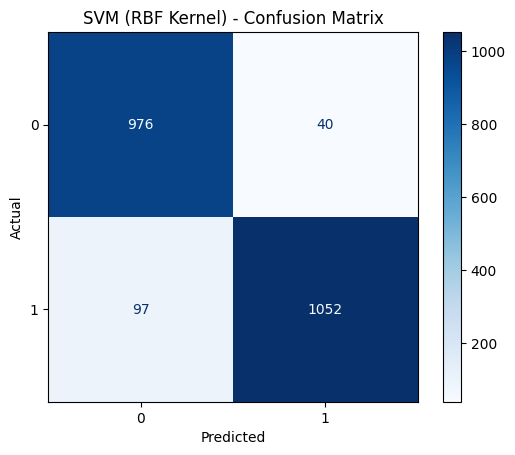

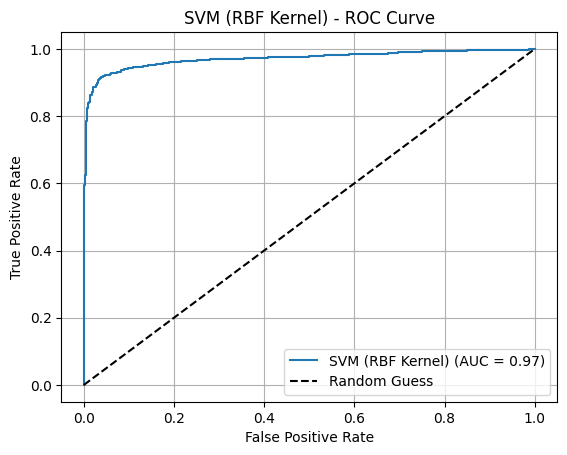

In [88]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Evaluate models
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Fit the model
    model.fit(xtrain_counts, ytrain2)
    
    # Predict the results
    preds = model.predict(xtest_counts)
    
    # Print classification report
    print(classification_report(ytest2, preds))
    
    # Confusion matrix
    cm = confusion_matrix(ytest2, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Plot confusion matrix
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC-AUC Curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(xtest_counts)[:, 1]
    else:
        probs = model.decision_function(xtest_counts)
    
    fpr, tpr, _ = roc_curve(ytest2, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


## Finetuning Logistic Regression and Support Vector Machine Using Grid Search
- Utilize grid search to fine tune these models to obtain the best hyperparanters

### Logistic Regression
- class_weight = balanced: since we have slightly imbalanced dataset this setting helps the algorithm give more importance to minority class samples during training
- C: inverse of regularization strength
- solver: optimization algorithm used during training

In [49]:
# Set config for GridSearchCV
config_logreg = {
    'model': LogisticRegression()
    , 'name': 'Log Reg'
    , 'param_grid':
    {
        'class_weight': ['balanced']
        , 'C': [0.5, 1.0, 1.5]
        , 'solver': ['saga', 'lbfgs']
    }
}

## SVM 
- class_weight = balanced: the same setting as in the Logistic Regression with similar reasoning
- probability = True: allows the model to predict class probabilities which is useful in our case to calculate logloss
- max_iter = 100: determines the maximum number of iterations taken for the solvers to converge
- C: smaller values create a wider-margin decision boundary, potentially improving generalization, larger - fitting the training data more closely
- kernel: function to transform the input data

In [50]:
# Set config for GridSearchCV
config_svm = {
    'model': SVC()
    , 'name': 'SVM'
    , 'param_grid':
    {
        'class_weight': ['balanced']
        , 'probability': [True]
        , 'max_iter': [100]
        , 'C': [0.5, 1.0, 1.5]
        , 'kernel': ['rbf', 'sigmoid']
    }
}

In [51]:
def get_grid(config_model, X_train, y_train):
    """
    Return grid of GridSearchCV results from selected models and their parameters.
    Execution in parallel.
    
    Args:
        config_model (dict): dictionary of model's parameters
        X_train (ndarray): data to train
        y_train (ndarray): data labels
    Returns:
        dict: a dictionary with the results from training via GridSeachCV
    """
    # GridSearchCV utilizes all available CPU cores with n_jobs = -1.
    grid = GridSearchCV(config_model['model']
                        , config_model['param_grid']
                        , return_train_score = True
                        , scoring = 'neg_log_loss'
                        , cv = 5
                        , n_jobs = -1)

    # Fit object to training data
    grid = grid.fit(X_train, y_train)
        

    return grid

### Apply best LR model and obtain evaluation metrics

Best Parameters: GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 1.5], 'class_weight': ['balanced'],
                         'solver': ['saga', 'lbfgs']},
             return_train_score=True, scoring='neg_log_loss')
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1016
           1       0.96      0.92      0.94      1149

    accuracy                           0.93      2165
   macro avg       0.93      0.94      0.93      2165
weighted avg       0.94      0.93      0.93      2165



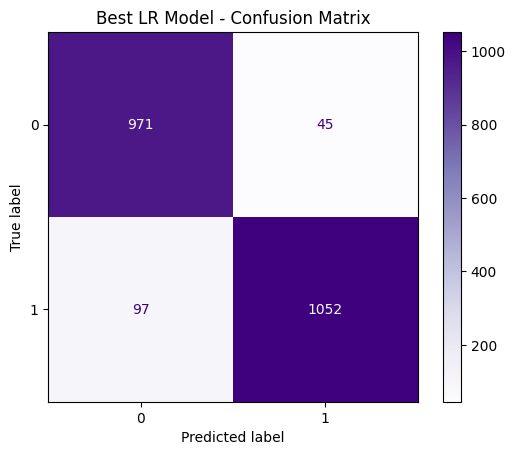

In [90]:
# apply get grid function for LR
grid_result = get_grid(config_logreg, xtrain_counts, ytrain2)
print("Best Parameters:", grid_result)

# Predict using the best model
best_model = grid_result.best_estimator_
y_pred_gr = best_model.predict(xtest_counts)

# Evaluation
print(classification_report(ytest2, y_pred_gr))

# Confusion Matrix
cm = confusion_matrix(ytest2, y_pred_gr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Best LR Model - Confusion Matrix")
plt.show()

### Apply best SVM model and obtain evaluation metrics

Best Parameters: GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 1.5], 'class_weight': ['balanced'],
                         'kernel': ['rbf', 'sigmoid'], 'max_iter': [100],
                         'probability': [True]},
             return_train_score=True, scoring='neg_log_loss')
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1016
           1       0.90      0.77      0.83      1149

    accuracy                           0.83      2165
   macro avg       0.84      0.84      0.83      2165
weighted avg       0.84      0.83      0.83      2165



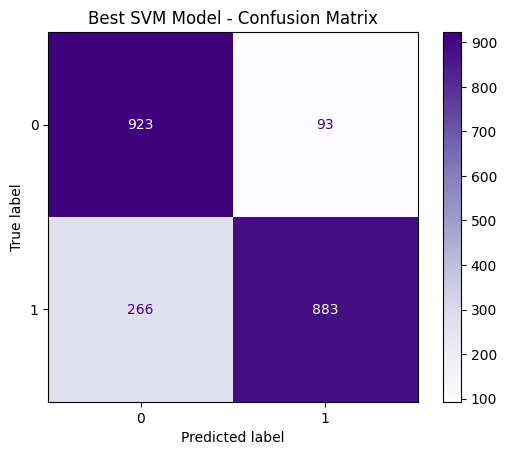

In [89]:
# apply get grid function for SVM
grid_result_s = get_grid(config_svm, xtrain_counts, ytrain2)
print("Best Parameters:", grid_result_s)


# Predict using the best model
best_model1 = grid_result_s.best_estimator_
y_pred_gr2 = best_model1.predict(xtest_counts)

# Evaluation
print(classification_report(ytest2, y_pred_gr2))

# Confusion Matrix
cm = confusion_matrix(ytest2, y_pred_gr2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Best SVM Model - Confusion Matrix")
plt.show()


# Deep Learning
- In this section two deep learning methods namely, BiLSTM and Attention Transformer Models will be built and applied to the dataset. 

In [103]:
# import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
import tensorflow_hub as hub
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, Embedding
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer

## Import data

In [104]:
# load the dataset
data1 = pd.read_csv('depression_dataset_reddit_cleaned.csv', 
                    usecols=["clean_text","is_depression"], 
                    na_values = ['no info', '.'])

In [105]:
# examine dataframe
data1

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


## Clean Data

In [106]:
# apply stop words function 
remove_stopwords_from_list(data1) 

[['l', 'e', 'n', '_', 'e', 'x'], ['_', 'e', 'p', 'r', 'e', 'n']]

In [107]:
# apply keep english function
data1['clean_text'] = df['clean_text'].astype(str).apply(keep_only_english)

In [108]:
# examine how many words present in data corpus
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data1['clean_text'])  # Replace with your column name
print(f"Total unique words: {len(tokenizer.word_index)}")

Total unique words: 17024


In [109]:
# Get the length of each sentence
sentence_lengths = data1['clean_text'].apply(lambda x: len(str(x).split()))

# Get the index of the maximum length
max_index = sentence_lengths.idxmax()

# Print the index and the sentence
print(f"Index of the longest sentence: {max_index}")
print(f"Length: {sentence_lengths[max_index]} words")
print(f"Sentence:\n{data1['clean_text'][max_index]}")


Index of the longest sentence: 2089
Length: 4238 words
Sentence:
it doesn t matter anymore i m going to copy and paste my note it really doesn t matter i know i m spilling my gut out oh who care now i m lonely i m a solider to my self pride status something i fail to achieve my whole life achieving to be a boy the one my parent are proud of the only reason i m not forgotten is because i m away from home do you think they remember me i m so fine with being lonesome i could live i no longer cry i no longer care i m not deep i m not feminine i no longer attract you i m not part of them or you or your life i m not even an outcast or part of the story all my life i thought of my self a the extra in this story but i realised i m not even that i m so lonesome and not noticeable i could disappear right in this northern line i carry everything in onto me try to care that i m awake but i remember everything what have i become maybe you could have it all maybe you are the one that make his memory

In [110]:
# !pip install tensorflow-hub

## Word2Vec
Word2vec is a technique in natural language processing (NLP) for obtaining vector representations of words. These vectors capture information about the meaning of the word based on the surrounding words. The word2vec algorithm estimates these representations by modeling text in a large corpus. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. Word2vec was developed by Tomáš Mikolov, Kai Chen, Greg Corrado, Ilya Sutskever and Jeff Dean at Google, and published in 2013. (Wikipedia).

Word2Vec provides pre-trained word embeddings, which represent words as dense vectors, capturing semantic relationships between them. These embeddings can be used as input to the BiLSTM model, which then processes the sequence of words to perform tasks like text classification or sentiment analysis. 

In light of this, Word2Vec has been incorporated into the BiLSTM Model

## BiLSTM Model 
**The data was preprocessed by:**

Tokenizing the text into sequences of integers, Limiting the vocabulary to the top 10,000 most frequent words, Padding sequences to a fixed length of 1000 tokens.

- We then built a Bidirectional LSTM neural network with the following structure:

- An embedding layer to learn word representations,

- Two stacked Bidirectional LSTM layers to capture contextual information from both directions,

- A dense output layer with a sigmoid activation for binary classification.

- The model was trained using the Adam optimizer and binary crossentropy loss, with performance evaluated on a validation set split from the original data.

- This approach leverages the sequential structure of language and is particularly useful for detecting subtle patterns in mental health-related text.

**BiLSTM Mathematical Equation**
## BiLSTM (Bidirectional LSTM)

A **BiLSTM** processes input sequences in **both forward and backward directions**, allowing the model to capture both **past** and **future context** at each time step.

### Equations

**Forward pass**:
$$
\overrightarrow{h}_t = \text{LSTM}_{\text{forward}}(x_t, \overrightarrow{h}_{t-1})
$$

**Backward pass**:
$$
\overleftarrow{h}_t = \text{LSTM}_{\text{backward}}(x_t, \overleftarrow{h}_{t+1})
$$

**Final hidden state** (concatenated):
$$
h_t = [\overrightarrow{h}_t ; \overleftarrow{h}_t]
$$

### Why use BiLSTM?
Unlike standard LSTM that only looks **backward in time**, BiLSTM also looks **forward**, making it great for NLP tasks.

---


In [111]:
# Parameters
max_features = 10000  # Only consider the top 10k words
maxlen = 1000  # Only consider the first 1000 words
embedding_dim = 300  # Dimensionality of Word2Vec embeddings (commonly 300)

# Prepare your data 
# data1 is DataFrame with 'clean_text' and 'is_depression'
texts = data1['clean_text'].astype(str).tolist()
labels = data1['is_depression'].astype(int).tolist()

# Split into train and validation
texts_train, texts_val, labels_train, labels_val = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# Tokenize the text 
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts_train)

x_train = tokenizer.texts_to_sequences(texts_train)
x_val = tokenizer.texts_to_sequences(texts_val)

# Pad sequences 
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)

y_train = np.array(labels_train)
y_val = np.array(labels_val)

# Train Word2Vec embeddings on the training data
def train_word2vec(sentences, embedding_dim):
    tokenized_sentences = [sentence.split() for sentence in sentences]
    w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)
    return w2v_model

w2v_model = train_word2vec(texts_train, embedding_dim)

# Create an embedding matrix
word_index = tokenizer.word_index
vocab_size = min(max_features, len(word_index)) + 1  # +1 for padding token
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i >= max_features:
        continue
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Define the model
inputs = Input(shape=(None,), dtype="int32")
embedding_layer = Embedding(
    vocab_size,
    embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False  # Freeze the embedding layer
)(inputs)
x = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)
model.summary()

# Compile and train
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_10 (Embedding)             │ (None, None, 300)           │       3,000,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, None, 128)           │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,286,125 (12.54 MB)

 Trainable params: 285,825 (1.09 MB)

 Non-trainable params: 3,000,300 (11.45 MB)

Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 107s 536ms/step - accuracy: 0.8435 - loss: 0.3333 - val_accuracy: 0.9444 - val_loss: 0.1354
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 102s 527ms/step - accuracy: 0.9420 - loss: 0.1531 - val_accuracy: 0.9257 - val_loss: 0.1713
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 107s 550ms/step - accuracy: 0.9351 - loss: 0.1605 - val_accuracy: 0.9425 - val_loss: 0.1351
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 109s 563ms/step - accuracy: 0.9430 - loss: 0.1388 - val_accuracy: 0.9451 - val_loss: 0.1254
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 117s 603ms/step - accuracy: 0.9427 - loss: 0.1314 - val_accuracy: 0.9483 - val_loss: 0.1231
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 118s 611ms/step - accuracy: 0.9466 - loss: 0.1333 - val_accuracy: 0.9457 - val_loss: 0.1250
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 120s 620ms/step - accuracy: 0.9474 - loss: 0.1270 - val_accuracy: 0.9483 - val_loss: 0.1234
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 129s 665ms/step - accuracy: 0.9406 -

In [112]:
# fit the model and convert to a pandas dataframe
history_df = pd.DataFrame(history.history) # convert history to pandas dataframe

# print my accuracy, and loss
print(history_df)

   accuracy      loss  val_accuracy  val_loss
0  0.897316  0.236513      0.944409  0.135448
1  0.937419  0.157053      0.925663  0.171312
2  0.936287  0.155555      0.942469  0.135120
3  0.939036  0.143355      0.945055  0.125402
4  0.943402  0.134098      0.948287  0.123148
5  0.944534  0.133705      0.945701  0.124961
6  0.944696  0.130992      0.948287  0.123438
7  0.941300  0.143252      0.945701  0.119908
8  0.945181  0.125143      0.948287  0.118029
9  0.944858  0.120111      0.948933  0.127009


### Plotting Visualization for Overfitting 

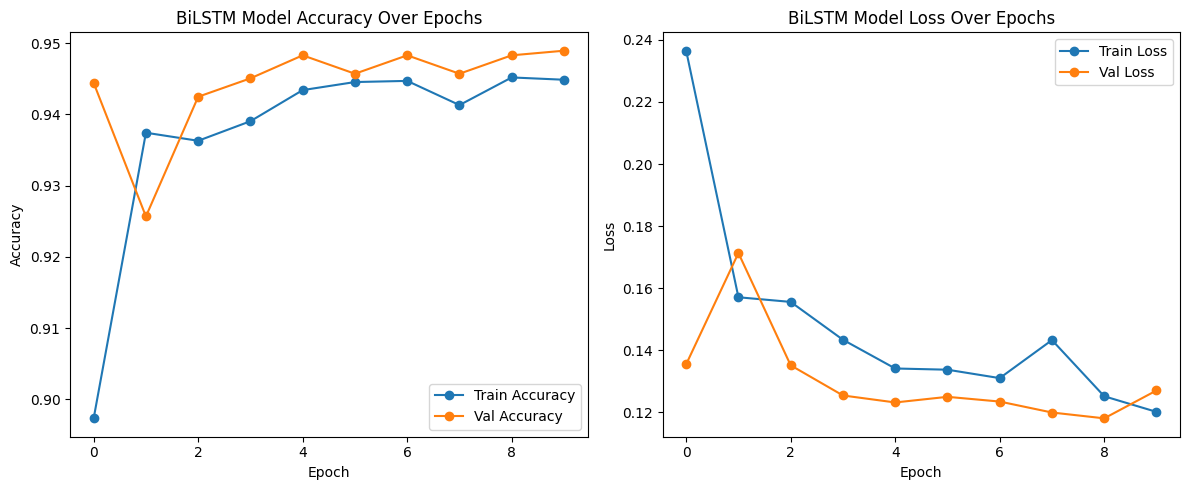

In [113]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('BiLSTM Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('BiLSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 331ms/step


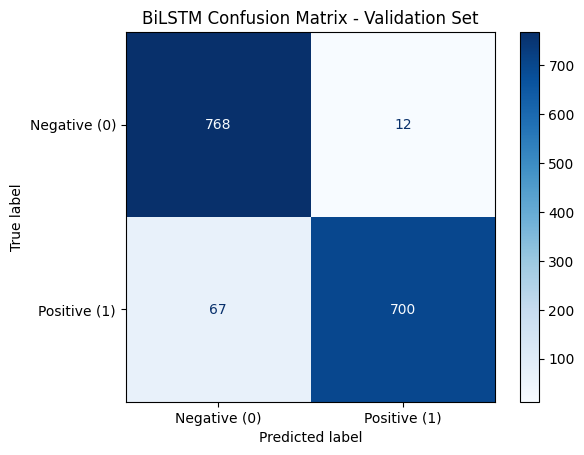

In [124]:
# Predict labels (as probabilities)
y_pred_probs = model.predict(x_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap='Blues')
plt.title("BiLSTM Confusion Matrix - Validation Set")
plt.show()

### Evaluation of model using F1 and ROC-AUC (Receiver Operating Characteristic – Area Under Curve)

- F1 Score balances Precision and Recall, particularly important for imbalanced datasets.
- ROC-AUC provides an overall measure of the classifier's performance, but it can be misleading in imbalanced datasets.

### F1 Score Formula

The F1 Score is the harmonic mean of precision and recall, and it is calculated as:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:
- **Precision** is the ratio of true positives to the total predicted positives:
  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$

- **Recall** is the ratio of true positives to the total actual positives:
  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$

---

### ROC-AUC Formula

The ROC-AUC (Area Under the Receiver Operating Characteristic Curve) measures the ability of the model to distinguish between classes. It is computed as the area under the ROC curve, which plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.

#### True Positive Rate (TPR):
$$
\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

#### False Positive Rate (FPR):
$$
\text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
$$

The ROC-AUC is then calculated as:
$$
\text{ROC-AUC} = \int_{0}^{1} \text{TPR}(FPR) \, d(\text{FPR})
$$

In practice, this integral is approximated numerically by calculating the area under the stepwise ROC curve.

In [115]:
# import evaluation metrics 
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc,  roc_curve

49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step
F1 Score: 0.9466
ROC-AUC: 0.9898


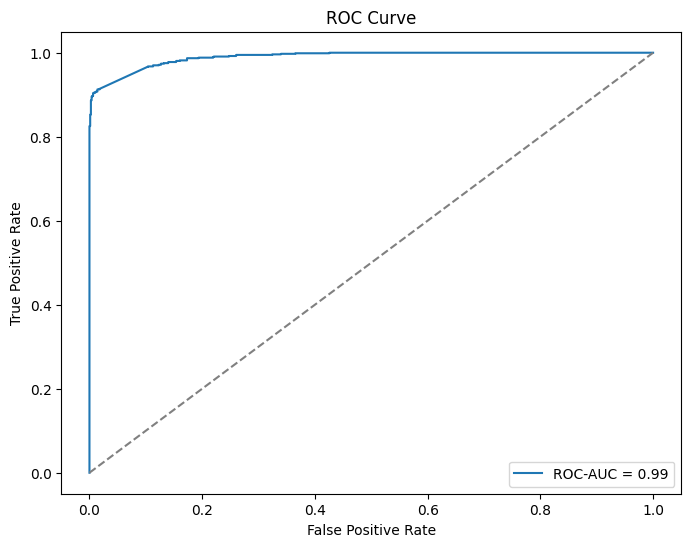

In [116]:
# Predictions
y_pred_probs = model.predict(x_val)  # Probabilities (sigmoid outputs)

# Convert probabilities to binary predictions (for F1 Score)
y_pred_class = (y_pred_probs > 0.5).astype(int)

# F1 Score
f1 = f1_score(y_val, y_pred_class)
print(f'F1 Score: {f1:.4f}')

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_probs)  # Use probabilities, not binary predictions
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_probs)  # Use probabilities
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Fine Tuning BiLSTM Model

- batch_size (use 64 instead of 32)

- learning_rate (tune Adam optimizer) 

- units in LSTM layers (64 and 128)

- epochs (decrease to 5 and use early stopping)

In [117]:
# Define and tune the BiLSTM model

# import dropout and l2 regularization 
from tensorflow.keras import regularizers

inputs = Input(shape=(None,), dtype="int32")
x = embedding_layer = Embedding(
    vocab_size,
    embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False  # Freeze the embedding layer
)(inputs)

# Add dropout and L2 regularization
x = layers.Bidirectional(
    layers.LSTM(
        64,
        return_sequences=True,
        dropout=0.3,
        kernel_regularizer=regularizers.l2(0.01)
    )
)(x)

x = layers.Bidirectional(
    layers.LSTM(
        128,
        kernel_regularizer=regularizers.l2(0.01)
    )
)(x)

x = layers.Dropout(0.1)(x)  # Regular dropout before Dense
outputs = layers.Dense(1, activation="sigmoid")(x)

model_f = keras.Model(inputs, outputs)
model_f.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_11 (Embedding)             │ (None, None, 300)           │       3,000,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, None, 128)           │         186,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,450,605 (13.16 MB)

 Trainable params: 450,305 (1.72 MB)

 Non-trainable params: 3,000,300 (11.45 MB)

In [118]:
# import adam optimizer 
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)  # increase learning rate for faster updates
model_f.compile(optimizer, "binary_crossentropy", metrics=["accuracy"])


In [119]:
# import early stopping 
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_f = model_f.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.5564 - loss: 2.3440 - val_accuracy: 0.5061 - val_loss: 0.7855
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.5864 - loss: 0.9310 - val_accuracy: 0.8009 - val_loss: 0.9817
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8504 - loss: 0.7246 - val_accuracy: 0.8688 - val_loss: 0.6972
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.8398 - loss: 0.6513 - val_accuracy: 0.4958 - val_loss: 2.3142
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.5106 - loss: 1.6238 - val_accuracy: 0.4958 - val_loss: 0.8700


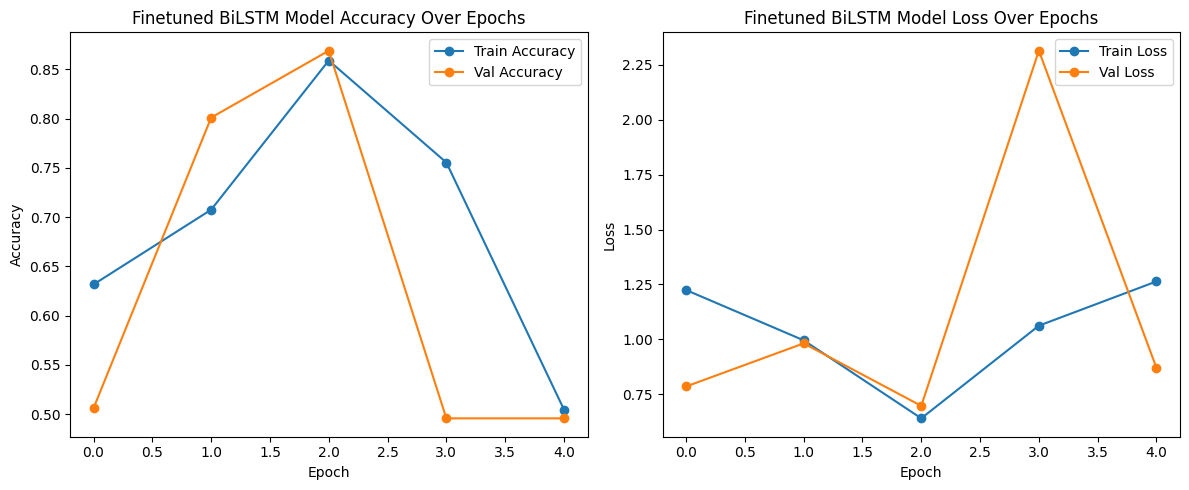

In [120]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_f.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_f.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Finetuned BiLSTM Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_f.history['loss'], label='Train Loss', marker='o')
plt.plot(history_f.history['val_loss'], label='Val Loss', marker='o')
plt.title('Finetuned BiLSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step


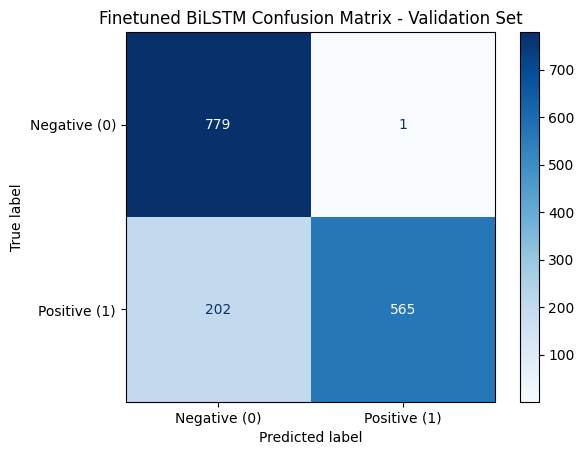

In [126]:
# Predict labels (as probabilities)
y_pred_prob_f = model_f.predict(x_val)

# Convert probabilities to binary predictions
y_pred_f = (y_pred_prob_f > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_f)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap='Blues')
plt.title("Finetuned BiLSTM Confusion Matrix - Validation Set")
plt.show()
plt.show()

49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step
F1 Score: 0.8477119279819955
ROC-AUC: 0.9519489853909671


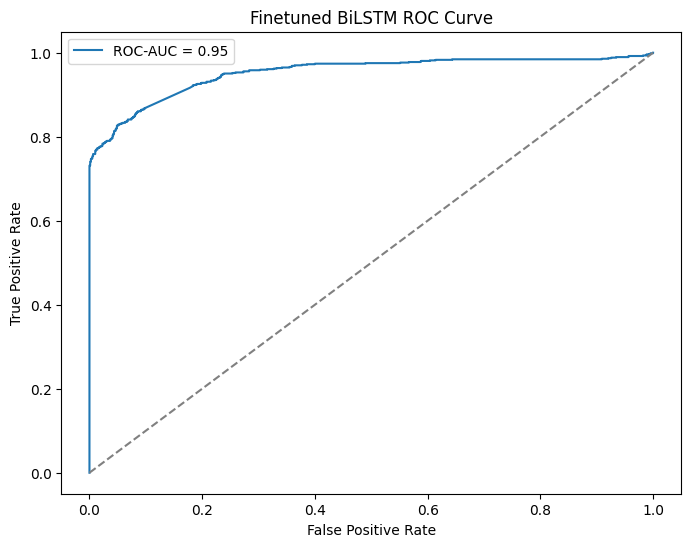

In [122]:
# Predictions
y_pred_F = model_f.predict(x_val) # Probabilities (sigmoid outputs)


# Convert probabilities to binary predictions (for F1 Score)
y_pred_class1 = (y_pred_F > 0.5) 

# F1 Score
f1 = f1_score(y_val, y_pred_class1)
print(f'F1 Score: {f1}')

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_F) # Use probabilities, not binary predictions
print(f'ROC-AUC: {roc_auc}')


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_F)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Finetuned BiLSTM ROC Curve')
plt.legend(loc='best')
plt.show()

## Transformer Model

Original authorship information Author: Apoorv Nandan

Date created: 2020/05/10

Last modified: 2024/04/15

Converted to Keras 3 by: Sitam Meur

Converted back to older Keras version and minor modifications and annotations made at the University of Hull

Original Source of code: https://github.com/keras-team/keras-io/blob/master/examples/nlp/text_classification_with_transformer.py [Accessed: 15/04/24]

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

## Transformer Architecture (Self-Attention)

The **Transformer** model is based entirely on **self-attention**, allowing it to capture long-range dependencies **without recurrence**.

### 🧠 Scaled Dot-Product Attention

Given matrices:
- \( Q \): Queries
- \( K \): Keys
- \( V \): Values
- \( d_k \): Key dimension

The attention mechanism is computed as:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right)V
$$

### Transformer Block Output

Each layer in the Transformer includes:
1. Self-attention/Multi-head attention (Different but related mechanisms)
2. Feedforward network
3. Residual connection
4. Layer normalization

This is represented as:

$$
\text{LayerNorm}(X + \text{FeedForward}(\text{SelfAttention}(X)))
$$


In [128]:
class TransformerBlock(layers.Layer):
    """
    Implement a transformer block as a class. It follows the
    standard architecture of a transformer).
    """

    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  # multihead attention and fully connected layers
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)  # layer normalization
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)  # dropout
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)  # corrected "inputs" to "inputs"
        attn_output = self.dropout1(attn_output) #, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)#,training=training)
        return self.layernorm2(out1 + ffn_output)

### Implement embedding layer
Two separate embedding layers, **one for tokens, one for token index (positions)**. Position embeddings give the transformer information about where the tokens appear in a sentence.
- Positional encodings and embeddings to represent input

In [129]:
class TokenAndPositionEmbedding(layers.Layer):
    """
    A class to implement position and token embeddings
    for a transformer.

    """
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [130]:
# Parameters
vocab_size = 10000  # Only consider the top 20k words
maxlen = 1000  # Only consider the first 1000 words of each post

# Preprocess your data
texts = data1['clean_text'].astype(str).tolist()  #  'clean_text' is the column with text
labels = data1['is_depression'].astype(int).tolist()  # 'is_depression' is the label column

# Split data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(texts, labels, test_size=0.3, stratify=labels, random_state=42)

# Tokenize the text
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)  # Fit on training data

# Convert text to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)

# Pad sequences
x_train_pad = keras.preprocessing.sequence.pad_sequences(x_train_seq, maxlen=maxlen)
x_val_pad = keras.preprocessing.sequence.pad_sequences(x_val_seq, maxlen=maxlen)

# Check the shapes
print(f"x_train_pad shape: {x_train_pad.shape}")
print(f"x_val_pad shape: {x_val_pad.shape}")


x_train_pad shape: (5411, 1000)
x_val_pad shape: (2320, 1000)


## Create classifier model using transformer layer
Transformer layer outputs one vector for each time step of our input sequence. Here, we take the mean across all time steps and use a feed forward network on top of it to classify text.

In [131]:
embed_dim = 32 # embedding size for each token
num_heads = 2 # number of attention heads
ff_dim = 32 # hideen layer sixe in feed forward network inside transformer

In [132]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x) # gets average of vector, can prevent overfitting
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_t = keras.Model(inputs=inputs, outputs=outputs)

model_t.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [133]:
# Ensure the data is in numpy array format
x_train_pad = np.array(x_train_pad)
x_val_pad = np.array(x_val_pad)
y_train = np.array(y_train)
y_val = np.array(y_val)

# Check shapes to confirm correctness
print(x_train_pad.shape)  # Should be (num_samples, maxlen)
print(x_val_pad.shape)  # Should be (num_samples, maxlen)

# Now fit the model
history_t = model_t.fit(
    x_train_pad, y_train, batch_size=32, epochs=10, validation_data=(x_val_pad, y_val)
)

(5411, 1000)
(2320, 1000)
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - accuracy: 0.6138 - loss: 0.6556 - val_accuracy: 0.7716 - val_loss: 0.5290
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 230ms/step - accuracy: 0.7367 - loss: 0.5315 - val_accuracy: 0.7772 - val_loss: 0.4589
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.7800 - loss: 0.4704 - val_accuracy: 0.8716 - val_loss: 0.4233
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.7937 - loss: 0.4365 - val_accuracy: 0.6526 - val_loss: 0.4747
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.8335 - loss: 0.3855 - val_accuracy: 0.8457 - val_loss: 0.3519
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.8640 - loss: 0.3498 - val_accuracy: 0.8892 - val_loss: 0.3430
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - accuracy: 0.8681 - loss: 0.3328 - val_accuracy: 0.8716 - val_loss: 0.3411
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - 

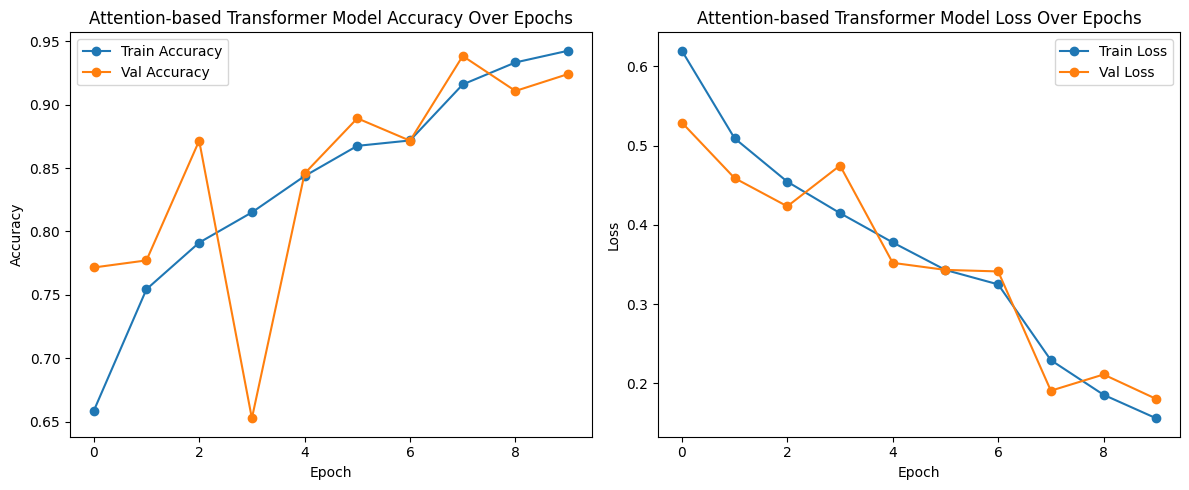

In [134]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_t.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_t.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Attention-based Transformer Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_t.history['loss'], label='Train Loss', marker='o')
plt.plot(history_t.history['val_loss'], label='Val Loss', marker='o')
plt.title('Attention-based Transformer Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step


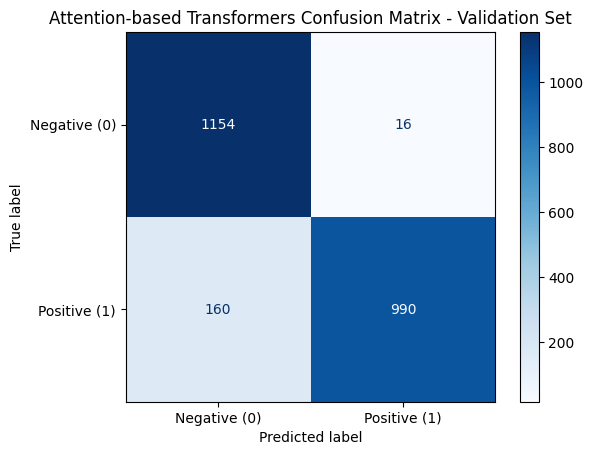

In [142]:
# Predict labels (as probabilities)
y_pred_prob_t = model_t.predict(x_val_pad)  # Get predicted probabilities

# Convert probabilities to binary predictions
y_pred_t = (y_pred_prob_t > 0.5).astype(int)  # Convert to class labels (0 or 1)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_t)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap='Blues')
plt.title("Attention-based Transformers Confusion Matrix - Validation Set")
plt.show()
plt.show()

73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
F1 Score: 0.9183673469387755
ROC-AUC: 0.9828056484578224


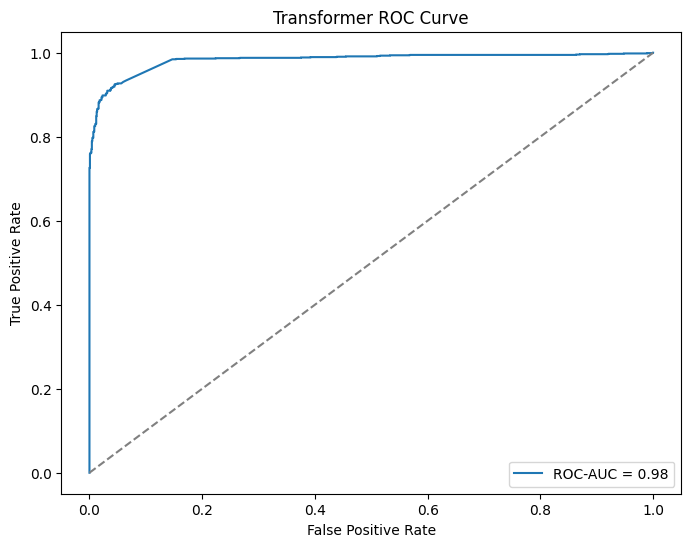

In [136]:
# Predictions
y_pred_t = model_t.predict(x_val_pad) # Probabilities (sigmoid outputs)


# Convert probabilities to binary predictions (for F1 Score)
y_pred_class0 = (y_pred_t > 0.5) 

# F1 Score
f1 = f1_score(y_val, y_pred_class0)
print(f'F1 Score: {f1}')

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_t) # Use probabilities, not binary predictions
print(f'ROC-AUC: {roc_auc}')


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_t)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Transformer ROC Curve')
plt.legend(loc='best')
plt.show()

### Fine Tuning of Attention Transformer

**Hyperparameter Tuning**

Hyperparameter tuning involves experimenting with different values for various model parameters to optimize performance.

Example of hyperparameters to tune:
- **Regularization:** This helps to prevent overfitting by adding constraints to the model’s learning. Common regularization techniques are Dropout, L2 regularization, and EarlyStopping.
- **Early Stopping**: Early stopping prevents the model from overfitting by stopping training when the validation accuracy stops improving.
- **Batch_size:** Batch size is the number of training examples processed together in one forward/backward pass during training.
- **Epoch:** Increase training epoch to 20

In [137]:
# import regularizers
from tensorflow.keras import regularizers

# Define the model with L2 regularization
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)  # gets average of vector, can prevent overfitting
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [138]:
# import earlystopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history2 = model2.fit(x_train_pad, y_train, epochs=20, batch_size=64, validation_data=(x_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.6158 - loss: 0.8715 - val_accuracy: 0.7513 - val_loss: 0.7330
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 417ms/step - accuracy: 0.7508 - loss: 0.6569 - val_accuracy: 0.9418 - val_loss: 0.2818
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 413ms/step - accuracy: 0.9376 - loss: 0.2879 - val_accuracy: 0.9418 - val_loss: 0.2554
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 410ms/step - accuracy: 0.9354 - loss: 0.2443 - val_accuracy: 0.9422 - val_loss: 0.1937
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 415ms/step - accuracy: 0.9339 - loss: 0.2097 - val_accuracy: 0.9418 - val_loss: 0.1756
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 414ms/step - accuracy: 0.9517 - loss: 0.1664 - val_accuracy: 0.9448 - val_loss: 0.1629
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 414ms/step - accuracy: 0.9505 - loss: 0.1526 - val_accuracy: 0.9466 - val_loss: 0.1515
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 35s 413ms/step - accuracy: 0.9569 - loss: 0.1325 - val_accu

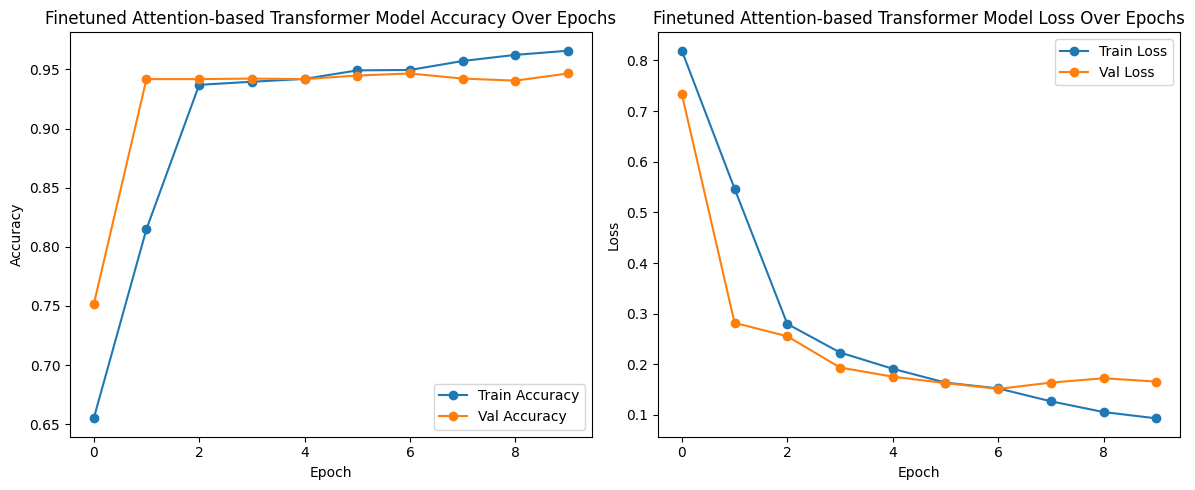

In [139]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Finetuned Attention-based Transformer Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss', marker='o')
plt.plot(history2.history['val_loss'], label='Val Loss', marker='o')
plt.title('Finetuned Attention-based Transformer Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step


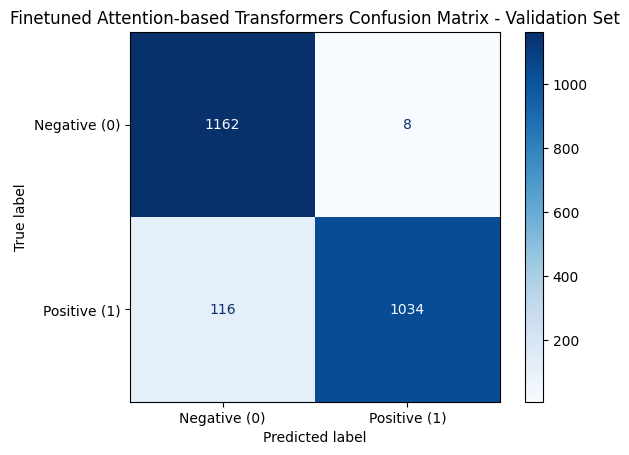

In [143]:
# Predict labels (as probabilities)
y_pred_prob1 = model2.predict(x_val_pad)  # Get predicted probabilities

# Convert probabilities to binary predictions
y_pred1 = (y_pred_prob1 > 0.5).astype(int)  # Convert to class labels (0 or 1)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred1)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative (0)", "Positive (1)"])
disp.plot(cmap='Blues')
plt.title("Finetuned Attention-based Transformers Confusion Matrix - Validation Set")
plt.show()
plt.show()

73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step
F1 Score: 0.9434306569343066
ROC-AUC: 0.987150873281308


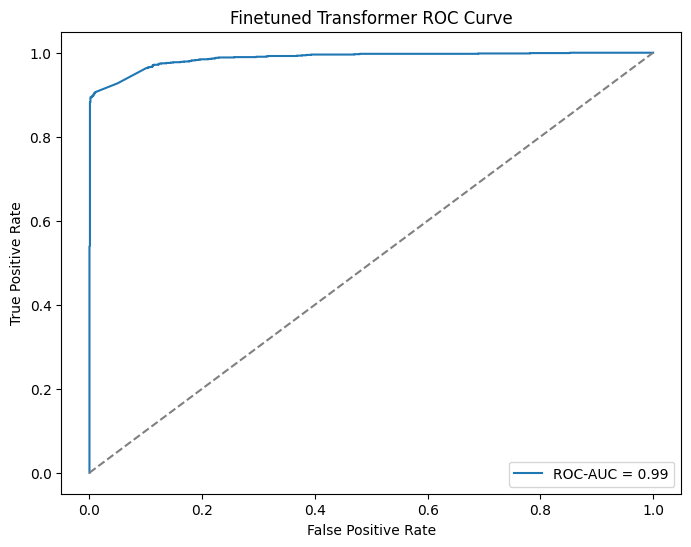

In [141]:
# Predictions
y_pred_prob2 = model2.predict(x_val_pad) # Probabilities (sigmoid outputs)


# Convert probabilities to binary predictions (for F1 Score)
y_pred_class2 = (y_pred_prob2 > 0.5) 

# F1 Score
f1 = f1_score(y_val, y_pred_class2)
print(f'F1 Score: {f1}')

# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_prob2) # Use probabilities, not binary predictions
print(f'ROC-AUC: {roc_auc}')


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob2)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Finetuned Transformer ROC Curve')
plt.legend(loc='best')
plt.show()

**References**
- Virk, J., no date. Fine-tuning: LogReg, RF, NB, SVM and XGBoost. [online] Kaggle. Available at: https://www.kaggle.com/code/jaymanvirk/fine-tuning-logreg-rf-nb-svm-and-xgboost [Accessed 21 Apr. 2025].